# Load multiband raster data via stream API

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import warnings

import geoengine as ge

## Initialize Geo Engine

In [2]:
ge.initialize("http://localhost:3030/api")

## Define workflow of a stacked raster of ndvi and land cover

In [3]:
workflow = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "RasterStacker",
                    "params": {},
                    "sources": {
                        "rasters": [
                            {
                                "type": "GdalSource",
                                "params": {
                                    "data": "ndvi"
                                }
                            }, {
                                "type": "GdalSource",
                                "params": {
                                    "data": "land_cover"
                                }
                            }
                        ]
                    }
                }
            })
workflow

3fb85bcc-4b88-5c39-a48e-ac6833d69a8e

## Define a query rectangle

In [4]:
time_start = datetime.strptime('2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")
time_end = datetime.strptime('2014-06-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")
bbox = ge.QueryRectangle(
    ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
    ge.TimeInterval(time_start, time_end),
    ge.SpatialResolution(0.5, 0.5),
)

# Query single tiles, merge them locally and output them as a single `DataArray`

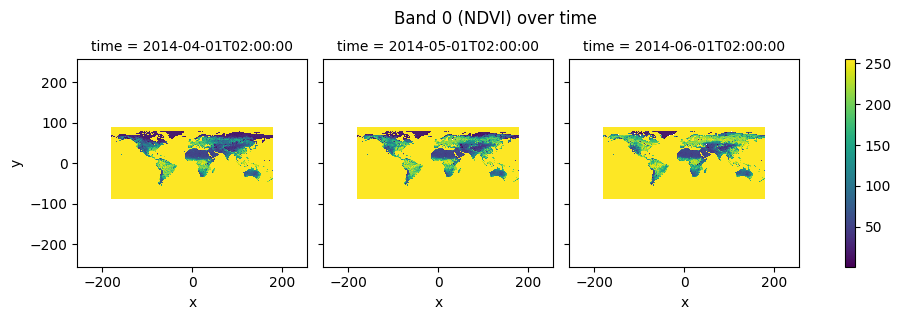

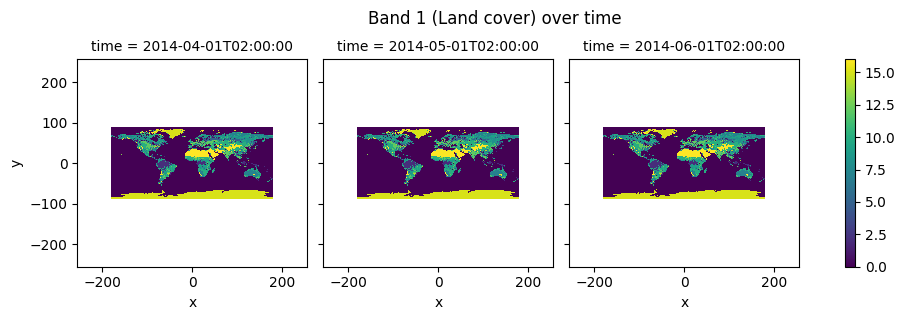

In [6]:
array = await workflow.raster_stream_into_xarray(bbox, bands=[0, 1])

array.isel(band=0).plot(col="time")
plt.suptitle("Band 0 (NDVI) over time", y=1.05)
plt.show()

array.isel(band=1).plot(col="time")
plt.suptitle("Band 1 (Land cover) over time", y=1.05)
plt.show()


## Output structure of the array

In [11]:
array.to_dataset(name = "Multi-Band")

<xarray.Dataset>
Dimensions:      (x: 1024, y: 1024, time: 3, band: 2)
Coordinates:
  * x            (x) float64 -255.8 -255.2 -254.8 -254.2 ... 254.8 255.2 255.8
  * y            (y) float64 255.8 255.2 254.8 254.2 ... -254.8 -255.2 -255.8
  * time         (time) datetime64[ns] 2014-04-01T02:00:00 ... 2014-06-01T02:...
  * band         (band) int64 0 1
    spatial_ref  int64 0
Data variables:
    test         (time, band, y, x) float64 nan nan nan nan ... nan nan nan nan